## Gradient Descent with Backtracking Line Search

### Overview

In this exercise, you will implement gradient descent with backtracking line search. You will visualize convergence behavior and apply your implementation to several problems.

### What You Need To Do

1. Implement Backtracking Line Search
    - Typical values: $\alpha \in (0, 0.5)$, $\beta \in (0.5, 1)$
1. Implement Gradient Descent
    - Make sure to copy arrays when needed to avoid aliasing bugs
1. Visualize Gradient Descent Path
1. Derive the gradients $\nabla f(w)$ and solve real machine learning problems
    - Linear regression: $\text{min} \frac{1}{n}\|Xw - y\|^2$
    - Logistic regression: $\text{min} \frac{1}{n}\sum_i \log(1 + \text{exp}({-y_i x_i^\top w}))$
### Submission

When done, paste your code into the quiz on Moodle and answer the questions.

In [1]:
# Importing libraries

from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.typing import NDArray
from sklearn.datasets import make_classification, make_regression

In [2]:
def contour_map(
    f: Callable[[NDArray], float],
    xb: tuple[float, float] = (-1.0, 1.0),
    yb: tuple[float, float] = (-1.0, 1.0),
) -> None:
    """Plots the contour lines of a scalar function on a 2D grid.

    Args:
        f (Callable[[NDArray], float]): Scalar function mapping points to values.
        xb (tuple[float, float], optional): Lower and upper bounds for the x-axis. Defaults to (-1.0, 1.0).
        yb (tuple[float, float], optional): Lower and upper bounds for the y-axis. Defaults to (-1.0, 1.0).
    Returns:
        None: This helper creates a matplotlib contour plot in the active axes.
    """
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    grid = np.block([[xv.reshape(1, -1)], [yv.reshape(1, -1)]]).T
    values = np.fromiter((f(point) for point in grid), dtype=np.double)
    plt.contour(xv, yv, values.reshape(nx, ny), 15)


def surface_plot(
    f: Callable[[NDArray], float],
    xb: tuple[float, float] = (-1.0, 1.0),
    yb: tuple[float, float] = (-1.0, 1.0),
) -> tuple[plt.Figure, Axes3D]:
    """Creates a 3D surface plot of a scalar function on a 2D grid.

    Args:
        f (Callable[[NDArray], float]): Scalar function mapping points to values.
        xb (tuple[float, float], optional): Lower and upper bounds for the x-axis. Defaults to (-1.0, 1.0).
        yb (tuple[float, float], optional): Lower and upper bounds for the y-axis. Defaults to (-1.0, 1.0).
    Returns:
        tuple[plt.Figure, Axes3D]: Figure and axis containing the rendered surface.
    """
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    grid = np.block([[xv.reshape(1, -1)], [yv.reshape(1, -1)]]).T
    values = np.fromiter((f(point) for point in grid), dtype=np.double)
    ax.plot_surface(xv, yv, values.reshape(nx, ny), cmap=cm.coolwarm)
    return fig, ax

## Task 1: Backtracking line search

Implement backtracking line search from the lecture. Use the function definition given below.
* `x` is the starting point of the line search.
* `d` is the direction of the line search ($\Delta x$).
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`
* `alpha` and `beta` are hyperparameters
  
The `backtracking_line_search` should return one scalar > 0.

In [3]:
def backtracking_line_search(
    x: NDArray,
    d: NDArray,
    f: Callable[[NDArray], float],
    g: Callable[[NDArray], NDArray],
    alpha: float = 0.3,
    beta: float = 0.8,
) -> float:
    """Performs Armijo backtracking line search for a descent direction.

    Args:
        x (NDArray): Current point in parameter space.
        d (NDArray): Candidate descent direction.
        f (Callable[[NDArray], float]): Objective function producing scalar values.
        g (Callable[[NDArray], NDArray]): Gradient of the objective function.
        alpha (float, optional): Armijo sufficient decrease parameter. Defaults to 0.3.
        beta (float, optional): Multiplicative shrink factor for the step size. Defaults to 0.8.
    Returns:
        float: Step length that satisfies the Armijo condition.
    """
    # TODO: Implement backtracking line search

    # raise NotImplementedError
    t = 1
    while(f(x + t*d) > f(x) + alpha*t*g(x)@d): # g and d matrices so mat-mul via @
        t *= beta
    return t

Your line search implementation should pass all of the below asserts.

In [4]:
def test_backtracking_line_search() -> None:
    x0 = 0.5 * np.ones(2)

    A = np.array([[30, 15], [-20, 25]])
    f = lambda x: float(x.T @ A @ x)
    g = lambda x: (A + A.T) @ x
    d = -g(x0)
    assert abs(backtracking_line_search(x0, d, f, g) - 0.02251799) < 1e-3

    f = lambda x: float(np.linalg.norm(np.sin(x)) ** 2)
    g = lambda x: 2 * np.sin(x) * np.cos(x)
    d = -g(x0)
    assert abs(backtracking_line_search(x0, d, f, g) - 0.8) < 1e-3
    assert abs(backtracking_line_search(x0, d, f, g, alpha=0.4) - 0.64) < 1e-3
    assert (
        abs(backtracking_line_search(x0, d, f, g, alpha=0.4, beta=0.9) - 0.729) < 1e-3
    )

    x0 = np.ones(3)
    f = lambda x: float(x[0] ** 2 - 3 * x[0] * x[1] + x[1] ** 2 + x[2] ** 2)
    g = lambda x: np.array([2 * x[0] - 3 * x[1], 2 * x[1] - 3 * x[0], 2 * x[2]])
    d = -20 * g(x0)
    assert abs(backtracking_line_search(x0, d, f, g) - 0.06872) < 1e-3

In [5]:
test_backtracking_line_search()

## Task 2: Gradient descent
Implement gradient descent using the backtracking line search.
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the gradient of `f`.

Function `gradient_descent` should return one vector.

In [6]:
def gradient_descent(
    x0: NDArray,
    f: Callable[[NDArray], float],
    g: Callable[[NDArray], NDArray],
    max_iter: int = 100,
) -> NDArray:
    """Runs gradient descent with backtracking line search.

    Args:
        x0 (NDArray): Initial point used to start the iterations.
        f (Callable[[NDArray], float]): Objective function producing scalar values.
        g (Callable[[NDArray], NDArray]): Gradient of the objective function.
        max_iter (int, optional): Maximum number of gradient steps. Defaults to 100.
    Returns:
        NDArray: Final iterate obtained after the gradient descent loop.
    """

    # TODO: Implement gradient descent with backtracking line search
    
    # raise NotImplementedError
    for _ in range(max_iter):
        x0 -= backtracking_line_search(x0, -g(x0), f, g) * g(x0)
    return x0

Your gradient descent implementation should pass all of the below asserts.

In [7]:
def test_gradient_descent() -> None:
    x0 = 0.5 * np.ones(2)

    A = np.array([[30, 15], [-20, 25]])
    f = lambda x: float(x.T @ A @ x + 1)
    g = lambda x: (A + A.T) @ x
    assert abs(f(gradient_descent(x0, f, g, max_iter=1000)) - 1.0) < 1e-3

    f = lambda x: float(np.linalg.norm(np.sin(x)) ** 2)
    g = lambda x: 2 * np.sin(x) * np.cos(x)
    assert abs(f(gradient_descent(x0, f, g))) < 1e-3
    assert abs(f(gradient_descent(x0 + 3.0, f, g))) < 1e-3

    x0 = np.ones(3)
    f = lambda x: float(x[0] ** 2 - 2 * x[0] * x[1] + x[1] ** 2 + x[2] ** 2)
    g = lambda x: np.array([2 * x[0] - 2 * x[1], 2 * x[1] - 2 * x[0], 2 * x[2]])
    assert abs(f(gradient_descent(x0, f, g))) < 1e-3

In [8]:
test_gradient_descent()

## Task 3: Surface plot, contour map, and path

Implement `gradient_descent_path` that returns the minimum and all the `x`s in between and plot them.

In [9]:
def gradient_descent_path(
    x0: NDArray,
    f: Callable[[NDArray], float],
    g: Callable[[NDArray], NDArray],
    max_iter: int = 100,
) -> list[NDArray]:
    """Collects iterates produced by gradient descent.

    Args:
        x0 (NDArray): Initial point used to seed the algorithm.
        f (Callable[[NDArray], float]): Objective function producing scalar values.
        g (Callable[[NDArray], NDArray]): Gradient of the objective function.
        max_iter (int, optional): Maximum number of gradient steps. Defaults to 100.
    Returns:
        list[NDArray]: Sequence of iterates, including the initial point.
    """

    # TODO: Implement gradient descent path creation

    # raise NotImplementedError
    xs = [x0.copy()]

    for _ in range(max_iter):
        x0 -= backtracking_line_search(x0, -g(x0), f, g) * g(x0)
        xs.append(x0.copy())
    
    return xs

[[ 5.00000000e-01  5.00000000e-01]
 [-2.04000000e-01 -7.60000000e-02]
 [ 3.88928000e-02 -1.90656000e-02]
 [-1.08509901e-02  4.44019712e-03]
 [ 2.93738272e-03 -1.21770612e-03]
 [-7.96766271e-04  3.30012937e-04]
 [ 2.16093448e-04 -8.95091767e-05]
 [-5.86079205e-05  2.42761893e-05]
 [ 1.58953740e-05 -6.58407960e-06]
 [-4.31107132e-06  1.78570421e-06]
 [ 1.16922923e-06 -4.84310604e-07]
 [-3.17113054e-07  1.31352528e-07]
 [ 8.60059655e-08 -3.56248373e-08]
 [-2.33261482e-08  9.66200696e-09]
 [ 6.32641223e-09 -2.62048575e-09]
 [-1.71582086e-09  7.10716270e-10]
 [ 3.60932079e-09 -1.49502962e-09]
 [-7.59239898e-09  3.14487463e-09]
 [-1.41539096e-09  5.86274132e-10]
 [ 2.97735045e-09 -1.23325894e-09]
 [-6.26301564e-09  2.59422602e-09]
 [ 1.69862672e-09 -7.03594227e-10]
 [-3.57315200e-09  1.48004802e-09]
 [ 7.51631601e-09 -3.11336003e-09]
 [ 1.40120742e-09 -5.80399115e-10]
 [-2.94751461e-09  1.22090053e-09]
 [ 6.20025435e-09 -2.56822944e-09]
 [-1.68160489e-09  6.96543552e-10]
 [ 3.53734567e-09 -1

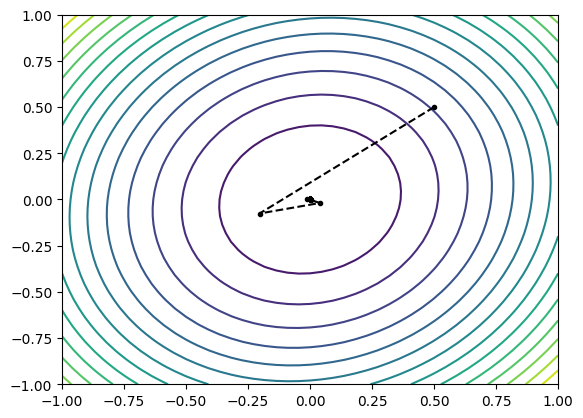

In [10]:
x0 = 0.5 * np.ones(2)

A = np.array([[30.0, 15], [-20, 25]]) / 20

f = lambda x: x.T @ A @ x + 1
g = lambda x: (A + A.T) @ x

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)
print(xs)

contour_map(f)
plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()

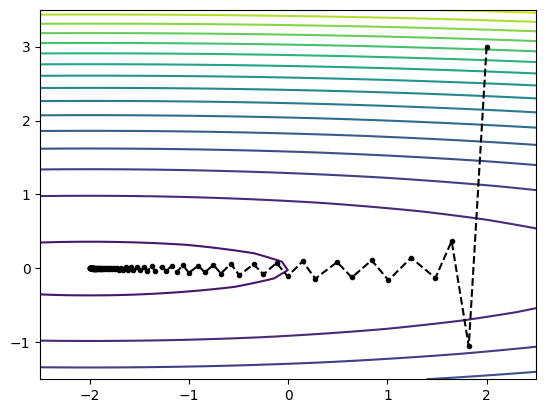

In [11]:
x0 = np.array([2.0, 3.0])

f = lambda x: (x[0] ** 2 + 30 * x[1] ** 2 + 4 * x[0])
g = lambda x: np.array([2 * x[0] + 4, 60 * x[1]])

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f, xb=(-2.5, 2.5), yb=(-1.5, 3.5))
plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()


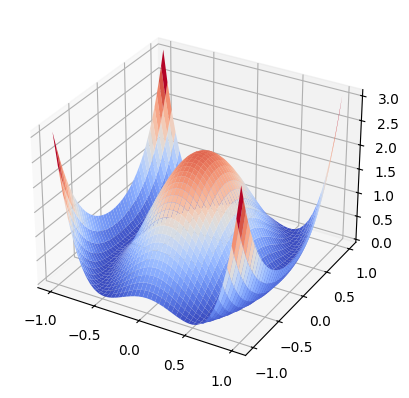

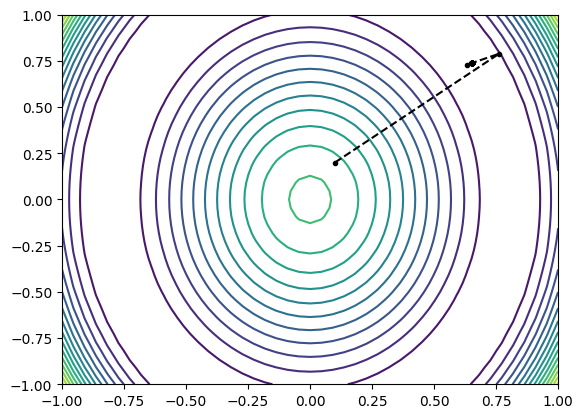

In [12]:
x0 = np.array([0.1, 0.2])
b = np.array([1.5, 1.0])

f = lambda x: (np.linalg.norm(x * b) ** 2 - 1.5) ** 2
g = lambda x: 4 * (np.linalg.norm(x * b) ** 2 - 1.5) * x * b * b

surface_plot(f)
plt.show()

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f)
plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()

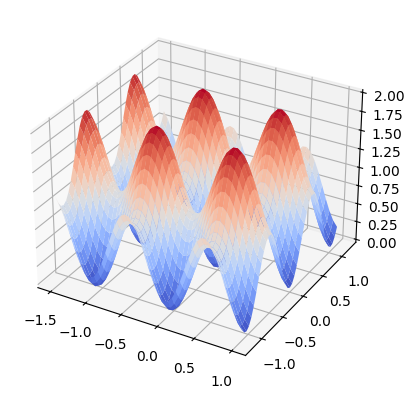

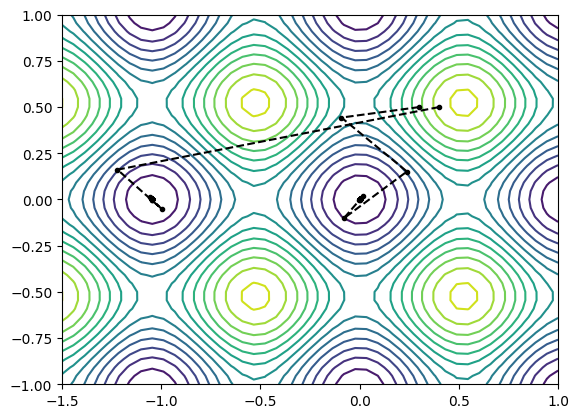

In [13]:
x0 = np.array([0.3, 0.5])

f = lambda x: np.linalg.norm(np.sin(x * 3)) ** 2
g = lambda x: 6 * np.sin(x * 3) * np.cos(x * 3)

surface_plot(f, xb=(-1.5, 1.0), yb=(-1.2, 1.2))
plt.show()

xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f, xb=(-1.5, 1.0), yb=(-1.0, 1.0))
plt.plot(xs[:, 0], xs[:, 1], ".--k")

x0 = np.array([0.4, 0.5])
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()

## Task 4: Linear regression

### 2D linear regression

Finish the gradient `g` of the linear regression loss.

Additionaly to the contour map, plot the gradient and loss function over iterations. 

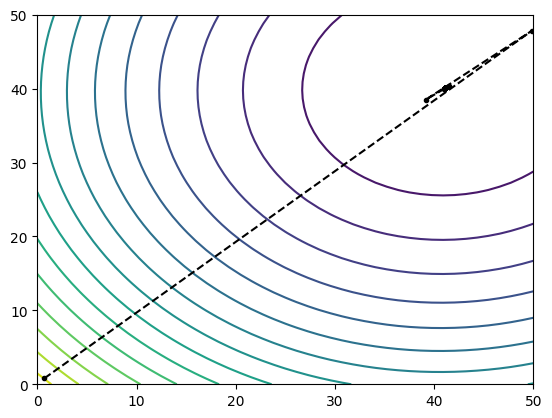

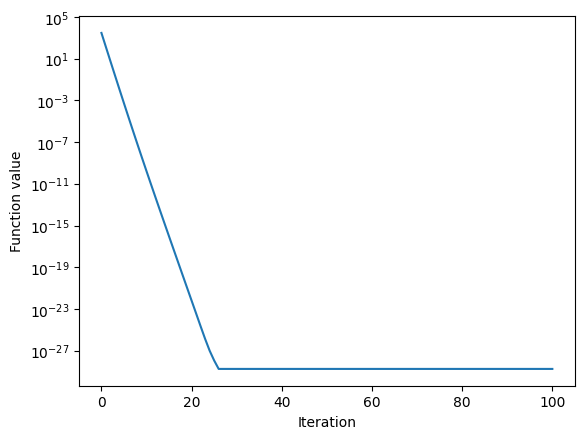

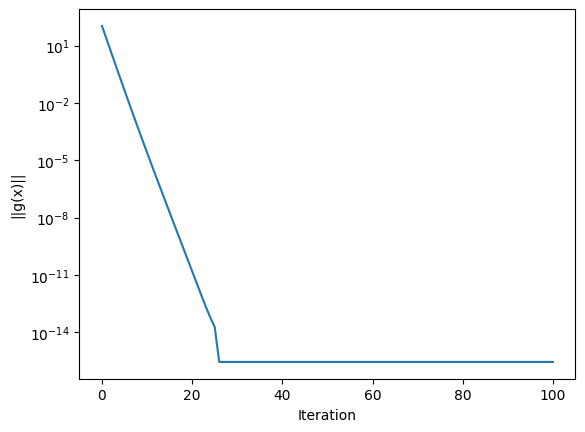

In [14]:
X, y = make_regression(n_samples=1000, n_features=2, n_informative=2, random_state=0)


def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X)


# TODO: Define the gradient function
def g(w):
    # raise NotImplementedError
    return 2*X.T@(X@w - y)/len(X)


x0 = np.array([0.7, 0.8])
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

contour_map(f, xb=(0, 50), yb=(0, 50))
plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("||g(x)||")
plt.show()

### Highdimensional linear regression

Plot the function value and norm of gradient for this higher-dimensional dataset.

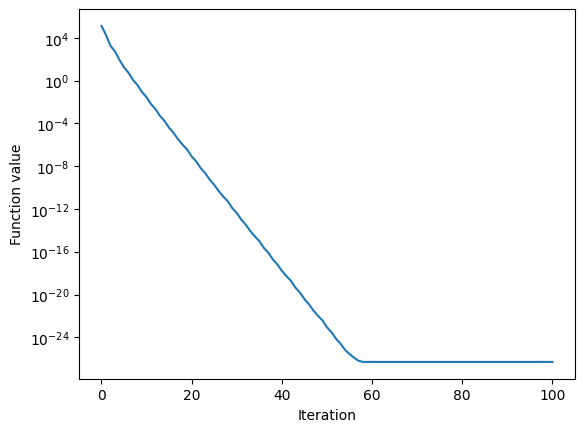

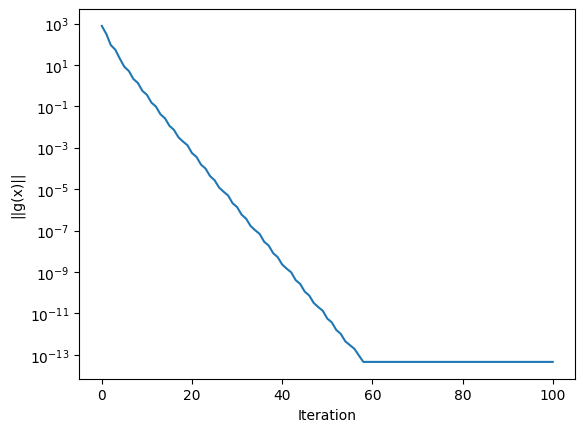

In [15]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)

x0 = np.zeros(100)
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("||g(x)||")
plt.show()

## Task 5: Logistic regression


### 2D logistic regression

Finish the gradient `g` of the logistic regression loss.

Additionaly to the given contour map, plot the gradient and loss function over iterations.

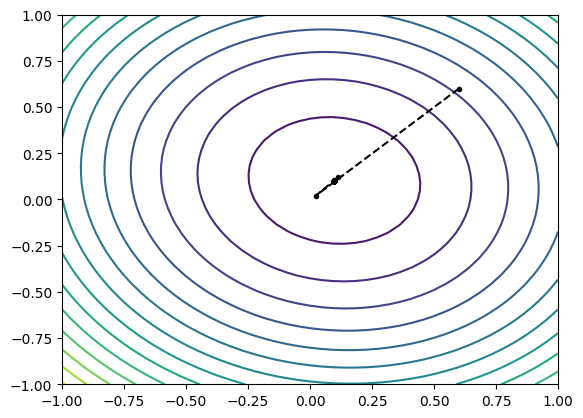

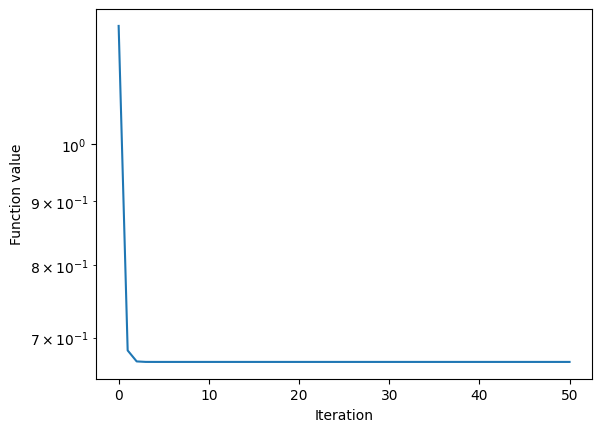

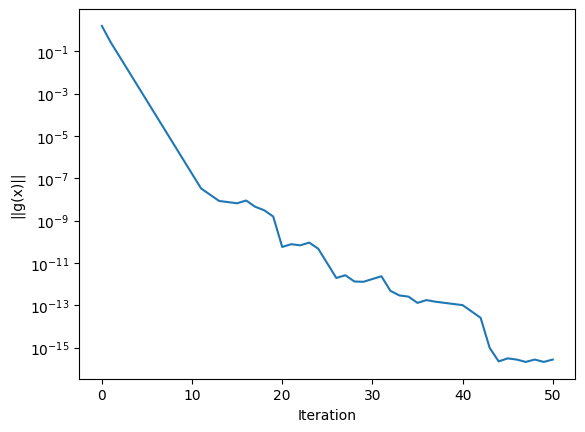

In [16]:
X, y = make_classification(
    1000,
    2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    random_state=0,
)


def f(w):
    # print('y', y.shape)
    # print('X', X.shape)
    # print('w', w.shape)
    # print('(-y * X.dot(w)))', (-y * X.dot(w)).shape)
    # # print('-y*X', -y*X)
    # print('X@w', (X@w).shape)
    # print(np.linalg.norm(w) ** 2)
    return np.log(1.0 + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w) ** 2


# TODO: Define the gradient function
def g(w):
    # print('X.T', X.T.shape)
    # print('np.exp(-y*X.dot(w)).T', np.exp(-y*X.dot(w)).T.shape)
    # print('(1.0 + np.exp(-y*X.dot(w)))', (1.0 + np.exp(-y*X.dot(w))).shape)
    # print('-y * np.exp(-y*X.dot(w)).T', (-y * np.exp(-y*X.dot(w)).T).shape)
    # print('(-y * np.exp(-y*X.dot(w)).T / (1.0 + np.exp(-y*X.dot(w)))).mean()', (-y * np.exp(-y*X.dot(w)).T / (1.0 + np.exp(-y*X.dot(w)))).mean())
    # print('(-y * np.exp(-y*X.dot(w)).T / (1.0 + np.exp(-y*X.dot(w))))', (-y * np.exp(-y*X.dot(w)).T / (1.0 + np.exp(-y*X.dot(w)))).shape)

    # return X.T * (-y * np.exp(-y*X.dot(w)).T / (1.0 + np.exp(-y*X.dot(w)))).mean() + 2*w

    return X.T.dot(-y / (1.0 + np.exp(y * X.dot(w)))) / len(X) + 2*w # exp simpl.
    return X.T.dot(-y * np.exp(-y*X.dot(w)) / (1.0 + np.exp(-y*X.dot(w)))) / len(X) + 2*w


x0 = np.array([0.6, 0.6])
xs = gradient_descent_path(x0, f, g, max_iter=50)
xs = np.array(xs)

contour_map(f)
plt.plot(xs[:, 0], xs[:, 1], ".--k")
plt.show()

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("||g(x)||")
plt.show()

### Highdimensional logistic regression

Plot the function value and norm of gradient for this higher-dimensional dataset.


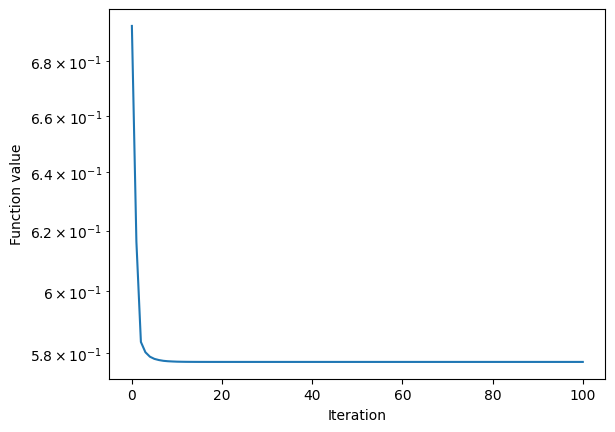

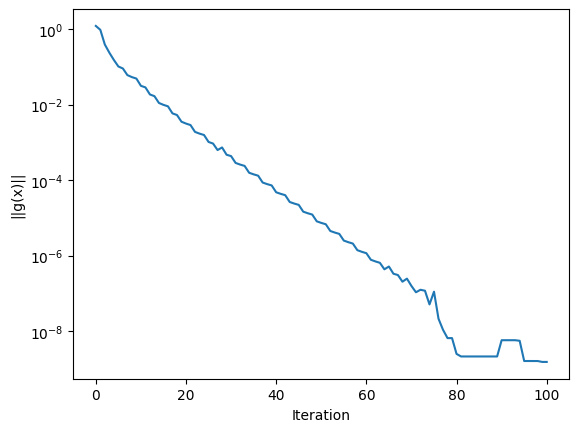

In [17]:
X, y = make_classification(
    1000,
    80,
    n_informative=40,
    n_clusters_per_class=2,
    flip_y=0.1,
    random_state=0,
)

x0 = np.zeros(80)
xs = gradient_descent_path(x0, f, g)
xs = np.array(xs)

plt.semilogy(np.arange(len(xs)), [f(x) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("Function value")
plt.show()

plt.semilogy(np.arange(len(xs)), [np.linalg.norm(g(x)) for x in xs])
plt.xlabel("Iteration")
plt.ylabel("||g(x)||")
plt.show()